<a href="https://colab.research.google.com/github/AlcoholWolf/py-play/blob/main/ch02_11_%EC%8B%A4%EC%A0%84_%EC%9E%AC%EC%A0%95%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%8B%9C%EA%B0%81%ED%99%94_%EA%B2%BD%EC%A7%84%EB%8C%80%ED%9A%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ch02.11. 실전-재정데이터 시각화 경진대회

---

* 날짜:
* 이름:

[재정 데이터 시각화 경진대회](https://dacon.io/competitions/official/235767/overview/description)

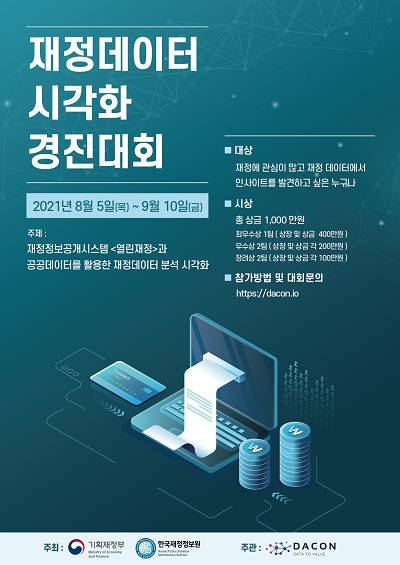

## Step 1 : 시작 해보기
---

**주제** : 연도에 따른 분야별 재정지출 추이 및 비율 시각화

### | **환경세팅**

* matplotlib에서 사용할 수 있는 폰트 확인

* 한글 폰트 설치

* 라이브러리 임포트 및 세팅

In [165]:
# basic 
import time
import random
import math

#data analytics
import numpy as np
import pandas as pd

import os    

#Math
import scipy as sp
import statsmodels.api as sm

#web crawling
import requests
from bs4 import BeautifulSoup

#visualization
import matplotlib as mpl
import matplotlib.pylab as plb
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns

# 브라우저에서 바로 그려지도록 
%matplotlib inline

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# # Colab 의 한글 폰트 설정
# plt.rc('font', family='NanumBarunGothic') 

# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)

plt.rcParams['figure.figsize'] = [12, 8]                 # 출력 크기 (x12 y8)
# plt.style.use('dark_background')                         # 메타포트 레이아웃 - 검은 바탕
sns.set_style(sns.set(color_codes=True))                 # 시본 레이아웃 - 컬러코드
sns.set(font_scale=1.2, style='white', palette='tab20')

def get_font_family():

    import platform
    system_name = platform.system()

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux(colab)
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family

plt.rc("font", family=get_font_family())

plt.rcParams['font.family'] = get_font_family()

/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: ca

* 드라이브 마운트

In [166]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


* 라이브러리 소개 : `tree` : 디렉토리 트리구조를 확인할 수 있다.

In [167]:
! sudo apt-get install tree

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tree is already the newest version (1.7.0-5).
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'sudo apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.


### | **데이터 확보**

데이터를 처리 하기 전 Step1 에서 진행 할 주제를 정의합니다. 

* 경로 설정

In [168]:
bassdata = '/content/drive/MyDrive/DataSetting/한국재정정보원_dataset/2021_한국재정정보원_공공데이터/분야별 재정지출'
# bassdata = pd.read_csv('/content/train.csv')

* 트리를 이용해 하위 폴더 구조 확인

In [169]:
! tree '/content/drive/MyDrive/DataSetting/한국재정정보원_dataset/2021_한국재정정보원_공공데이터/분야별 재정지출'

/content/drive/MyDrive/DataSetting/한국재정정보원_dataset/2021_한국재정정보원_공공데이터/분야별 재정지출
├── 교통 및 물류 분야
│   ├── 도로 부문 주요 프로그램별 추이.CSV
│   ├── 교통 및 물류 분야 주요 세부사업 현황.CSV
│   ├── 교통 및 물류 분야 회계·기금별 추이.CSV
│   ├── 교통 및 물류 분야 의무·재량지출 추이.CSV
│   ├── 교통 및 물류 분야 기금별 추이.CSV
│   ├── 교통 및 물류 분야 부문별 추이.CSV
│   ├── 교통 및 물류 분야 소관별 추이.CSV
│   ├── 교통 및 물류 분야 성질별 추이.CSV
│   ├── 교통 및 물류 분야 재정구조.CSV
│   ├── 교통 및 물류 분야 국고보조금 추이.CSV
│   ├── 교통 및 물류 분야 특별회계별 추이.CSV
│   ├── 철도 부문 주요 프로그램별 추이.CSV
│   ├── 해운·항만 부문 주요 프로그램별 추이.CSV
│   ├── 항공·공항 부문 주요 프로그램별 추이.CSV
│   └── 물류등기타 부문 주요 프로그램별 추이.CSV
├── 문화 및 관광 분야
│   ├── 문화 및 관광 분야 주요 세부사업 현황.CSV
│   ├──

* 하위폴더 확인 및 정의

In [170]:
# # fild = os.listdir(bassdata)
# fild = ['국방 분야',
#  '공공질서 및 안전 분야',
#  '교통 및 물류 분야',
#  '과학기술 분야',
#  '농림수산 분야',
#  '문화 및 관광 분야',
#  '사회복지 분야',
#  '교육 분야',
#  '국토 및 지역개발 분야',
#  '보건 분야',
#  '환경 분야',
#  '일반·지방행정 분야',
#  '통신 분야',
#  '예비비',
#  '프로그램 예산 개요',
#  '통일·외교 분야',
#  '산업·중소기업 및 에너지 분야']

#  # for

In [171]:
# fild = os.listdir(bassdata)
fildl = ['국방 분야',
 '공공질서 및 안전 분야',
 '교통 및 물류 분야',
 '과학기술 분야',
 '농림수산 분야',
 '문화 및 관광 분야',
 '사회복지 분야',
 '교육 분야',
 '국토 및 지역개발 분야',
 '보건 분야',
 '환경 분야',
 '일반·지방행정 분야',
 '통신 분야',
 '통일·외교 분야',
 '산업·중소기업 및 에너지 분야']

print(type(fildl[0]))

 # for

<class 'str'>


* 분야별 데이터 프레임 확보

In [172]:
datasets = []
for fildi in fildl:
    #print(fildi)

    filds = f'{bassdata}/{fildi}/{fildi} 재정구조.CSV'
    print(filds)
    datasets.append(pd.read_csv(filds, encoding='CP949'))

/content/drive/MyDrive/DataSetting/한국재정정보원_dataset/2021_한국재정정보원_공공데이터/분야별 재정지출/국방 분야/국방 분야 재정구조.CSV
/content/drive/MyDrive/DataSetting/한국재정정보원_dataset/2021_한국재정정보원_공공데이터/분야별 재정지출/공공질서 및 안전 분야/공공질서 및 안전 분야 재정구조.CSV
/content/drive/MyDrive/DataSetting/한국재정정보원_dataset/2021_한국재정정보원_공공데이터/분야별 재정지출/교통 및 물류 분야/교통 및 물류 분야 재정구조.CSV
/content/drive/MyDrive/DataSetting/한국재정정보원_dataset/2021_한국재정정보원_공공데이터/분야별 재정지출/과학기술 분야/과학기술 분야 재정구조.CSV
/content/drive/MyDrive/DataSetting/한국재정정보원_dataset/2021_한국재정정보원_공공데이터/분야별 재정지출/농림수산 분야/농림수산 분야 재정구조.CSV
/content/drive/MyDrive/DataSetting/한국재정정보원_dataset/2021_한국재정정보원_공공데이터/분야별 재정지출/문화 및 관광 분야/문화 및 관광 분야 재정구조.CSV
/content/drive/MyDrive/DataSetting/한국재정정보원_dataset/2021_한국재정정보원_공공데이터/분야

* 각 데이터 프레임 확인

In [173]:
# datasets[0]
for field, df in zip(fildl, datasets):
  print(field)
  print(df)

국방 분야
     연도   기준  합계예산(억원)  부문당 예산(억원)  프로그램당 예산(억원)  단위사업당 예산(억원)  세부사업당 예산(억원)
0  2015   결산    355926       88982         11481          2579           716
1  2016   결산    368460       92115         11165          2507           746
2  2017   결산    379425       94856         11498          2730           799
3  2018   결산    412322      103081         15859          3890           879
4  2019   결산    449063      112266         17963          4277           980
5  2020  본예산    486935      121734         20289          4682          1099
6  2021  본예산    514176      128544         20567          4897          1140
공공질서 및 안전 분야
     연도   기준  합계예산(억원)  부문당 예산(억원)  프로그램당 예산(억원)  단위사업당 예산(억원)  세부사업당 예산(억원)
0  2015   결산    167252       33450          3484           694           221
1  2016   결산    174966       34993          4069           862           310
2  2017   결산    183342       36668          4264           787           283
3  2018   결산    188128       37626          4375         

### | **데이터 처리**

* 데이터 통합

In [174]:
df = pd.concat(datasets, axis=0, ignore_index=True)
df.head(20)

,연도,기준,합계예산(억원),부문당 예산(억원),프로그램당 예산(억원),단위사업당 예산(억원),세부사업당 예산(억원)
0,2015,결산,355926,88982,11481,2579,716
1,2016,결산,368460,92115,11165,2507,746
2,2017,결산,379425,94856,11498,2730,799
3,2018,결산,412322,103081,15859,3890,879
4,2019,결산,449063,112266,17963,4277,980
5,2020,본예산,486935,121734,20289,4682,1099
6,2021,본예산,514176,128544,20567,4897,1140
7,2015,결산,167252,33450,3484,694,221
8,2016,결산,174966,34993,4069,862,310
9,2017,결산,183342,36668,4264,787,283


* 통합된 데이터프레임에 '분야' 컬럼 추가 

In [175]:
df['분야'] = [field for field in fildl for i in range(7)]
df.head(20)

,연도,기준,합계예산(억원),부문당 예산(억원),프로그램당 예산(억원),단위사업당 예산(억원),세부사업당 예산(억원),분야
0,2015,결산,355926,88982,11481,2579,716,국방 분야
1,2016,결산,368460,92115,11165,2507,746,국방 분야
2,2017,결산,379425,94856,11498,2730,799,국방 분야
3,2018,결산,412322,103081,15859,3890,879,국방 분야
4,2019,결산,449063,112266,17963,4277,980,국방 분야
5,2020,본예산,486935,121734,20289,4682,1099,국방 분야
6,2021,본예산,514176,128544,20567,4897,1140,국방 분야
7,2015,결산,167252,33450,3484,694,221,공공질서 및 안전 분야
8,2016,결산,174966,34993,4069,862,310,공공질서 및 안전 분야
9,2017,결산,183342,36668,4264,787,283,공공질서 및 안전 분야


* 데이터프레임 요약

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   연도            105 non-null    int64 
 1   기준            105 non-null    object
 2   합계예산(억원)      105 non-null    int64 
 3   부문당 예산(억원)    105 non-null    int64 
 4   프로그램당 예산(억원)  105 non-null    int64 
 5   단위사업당 예산(억원)  105 non-null    int64 
 6   세부사업당 예산(억원)  105 non-null    int64 
 7   분야            105 non-null    object
dtypes: int64(6), object(2)
memory usage: 6.7+ KB


### | **데이터 시각화**

* `groupby`로 연도별 총 예산 추이 시각화

In [177]:
g2 = g1.iloc[1:]

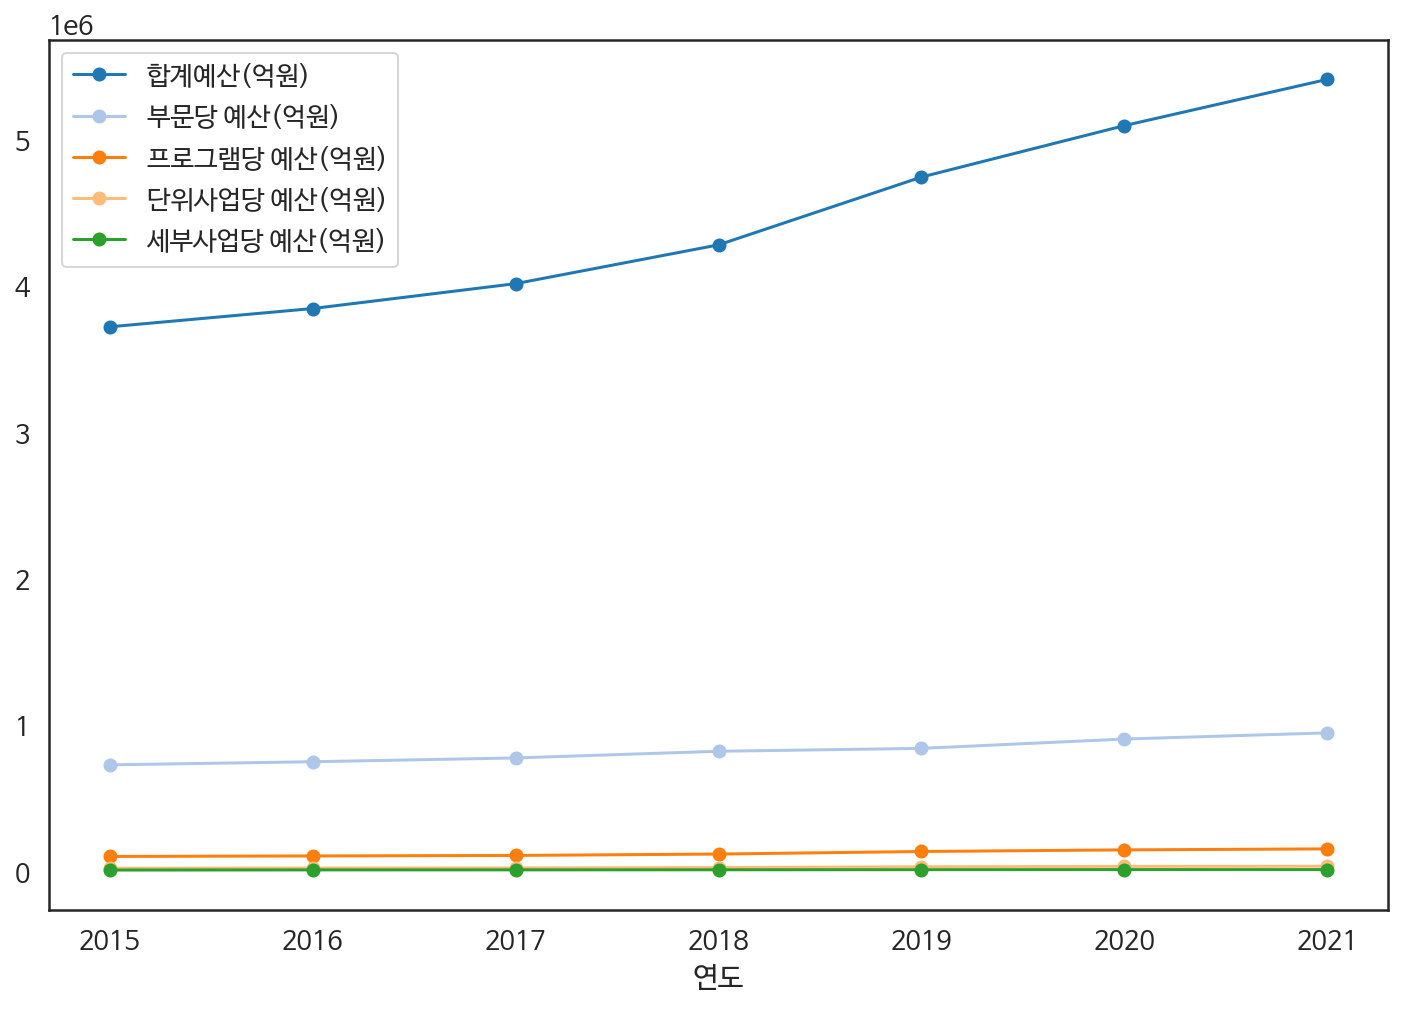

In [178]:
g1 = df.groupby('연도').sum()
g1.iloc[1:].plot(marker='o')
#g1.plot(marker='o')


* 피벗테이블로 시각화하기

In [179]:
piv = pd.pivot_table(data=df, index='분야', columns='연도', values='합계예산(억원)', sort=False)
piv.style.background_gradient()

연도,2014,2015,2016,2017,2018,2019,2020,2021
분야,,,,,,,,
국방 분야,nan,355926.000000,368460.000000,379425.000000,412322.000000,449063.000000,486935.000000,514176.000000
공공질서 및 안전 분야,nan,167252.000000,174966.000000,183342.000000,188128.000000,202277.000000,208371.000000,223050.000000
교통 및 물류 분야,nan,208920.000000,190500.000000,184756.000000,152515.000000,162935.000000,191844.000000,214243.000000
과학기술 분야,nan,65070.000000,66769.000000,70076.000000,69809.000000,72507.000000,82413.000000,89798.000000
농림수산 분야,nan,191130.000000,187369.000000,193670.000000,195821.000000,204327.000000,215153.000000,226557.000000
문화 및 관광 분야,61963.000000,67212.000000,69327.000000,63239.000000,72003.000000,80181.000000,84816.000000,nan
사회복지 분야,nan,1070096.000000,1124165.000000,1210037.000000,1360380.000000,1548464.000000,1670211.000000,1850459.000000
교육 분야,nan,524707.000000,553716.000000,591921.000000,643411.000000,705300.000000,726344.000000,712076.000000
국토 및 지역개발 분야,nan,45298.000000,39793.000000,34732.000000,36790.000000,43509.000000,40467.000000,50847.000000


* 연도별 합계예산 추이

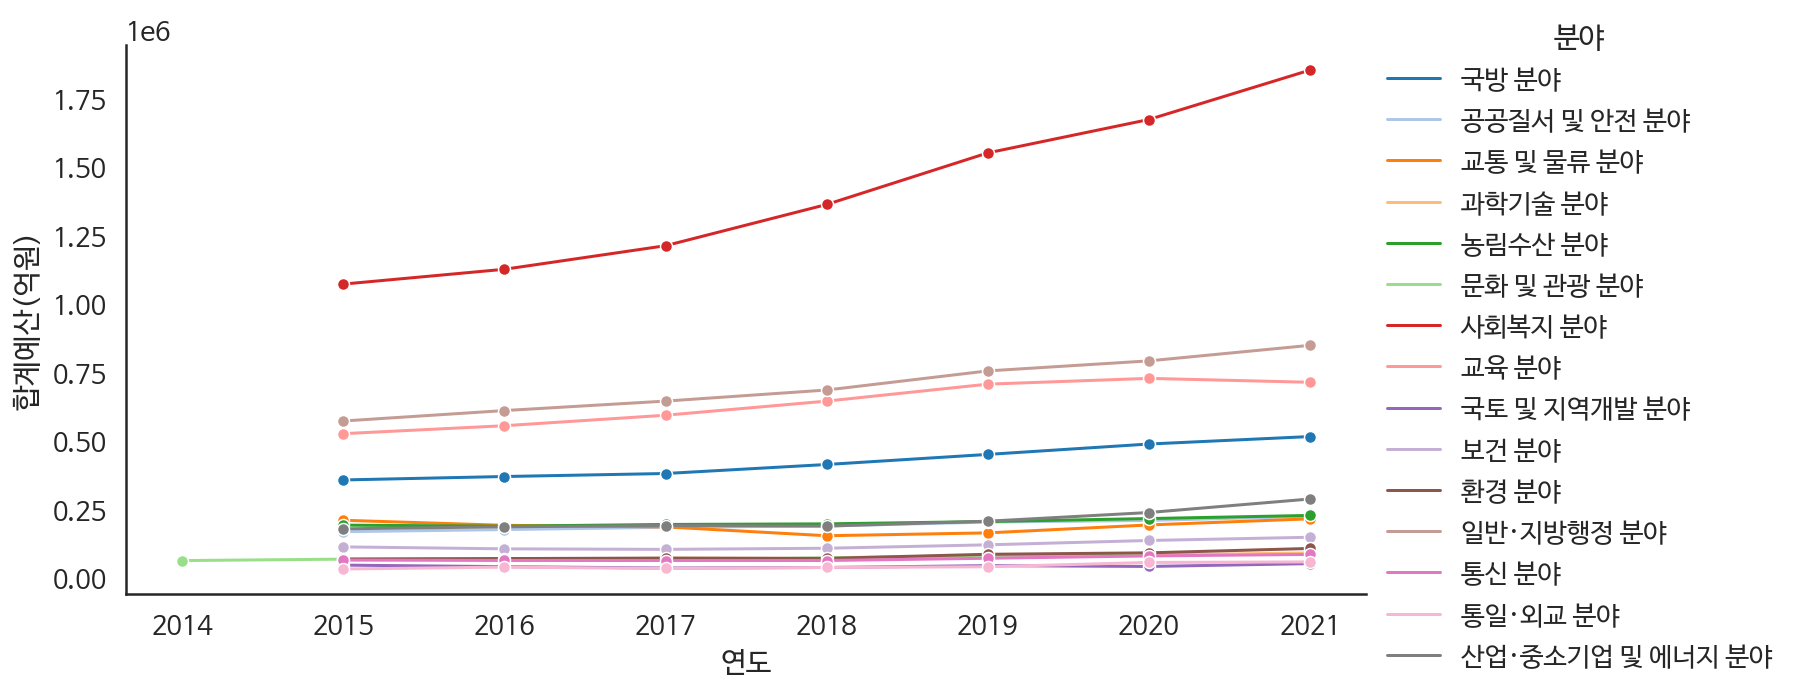

In [180]:
sns.relplot(data=df, x='연도', y='합계예산(억원)', 
            hue='분야',marker='o', kind='line', palette='tab20',
            aspect=2, )

* 연도에 따른 분야별 파이차트

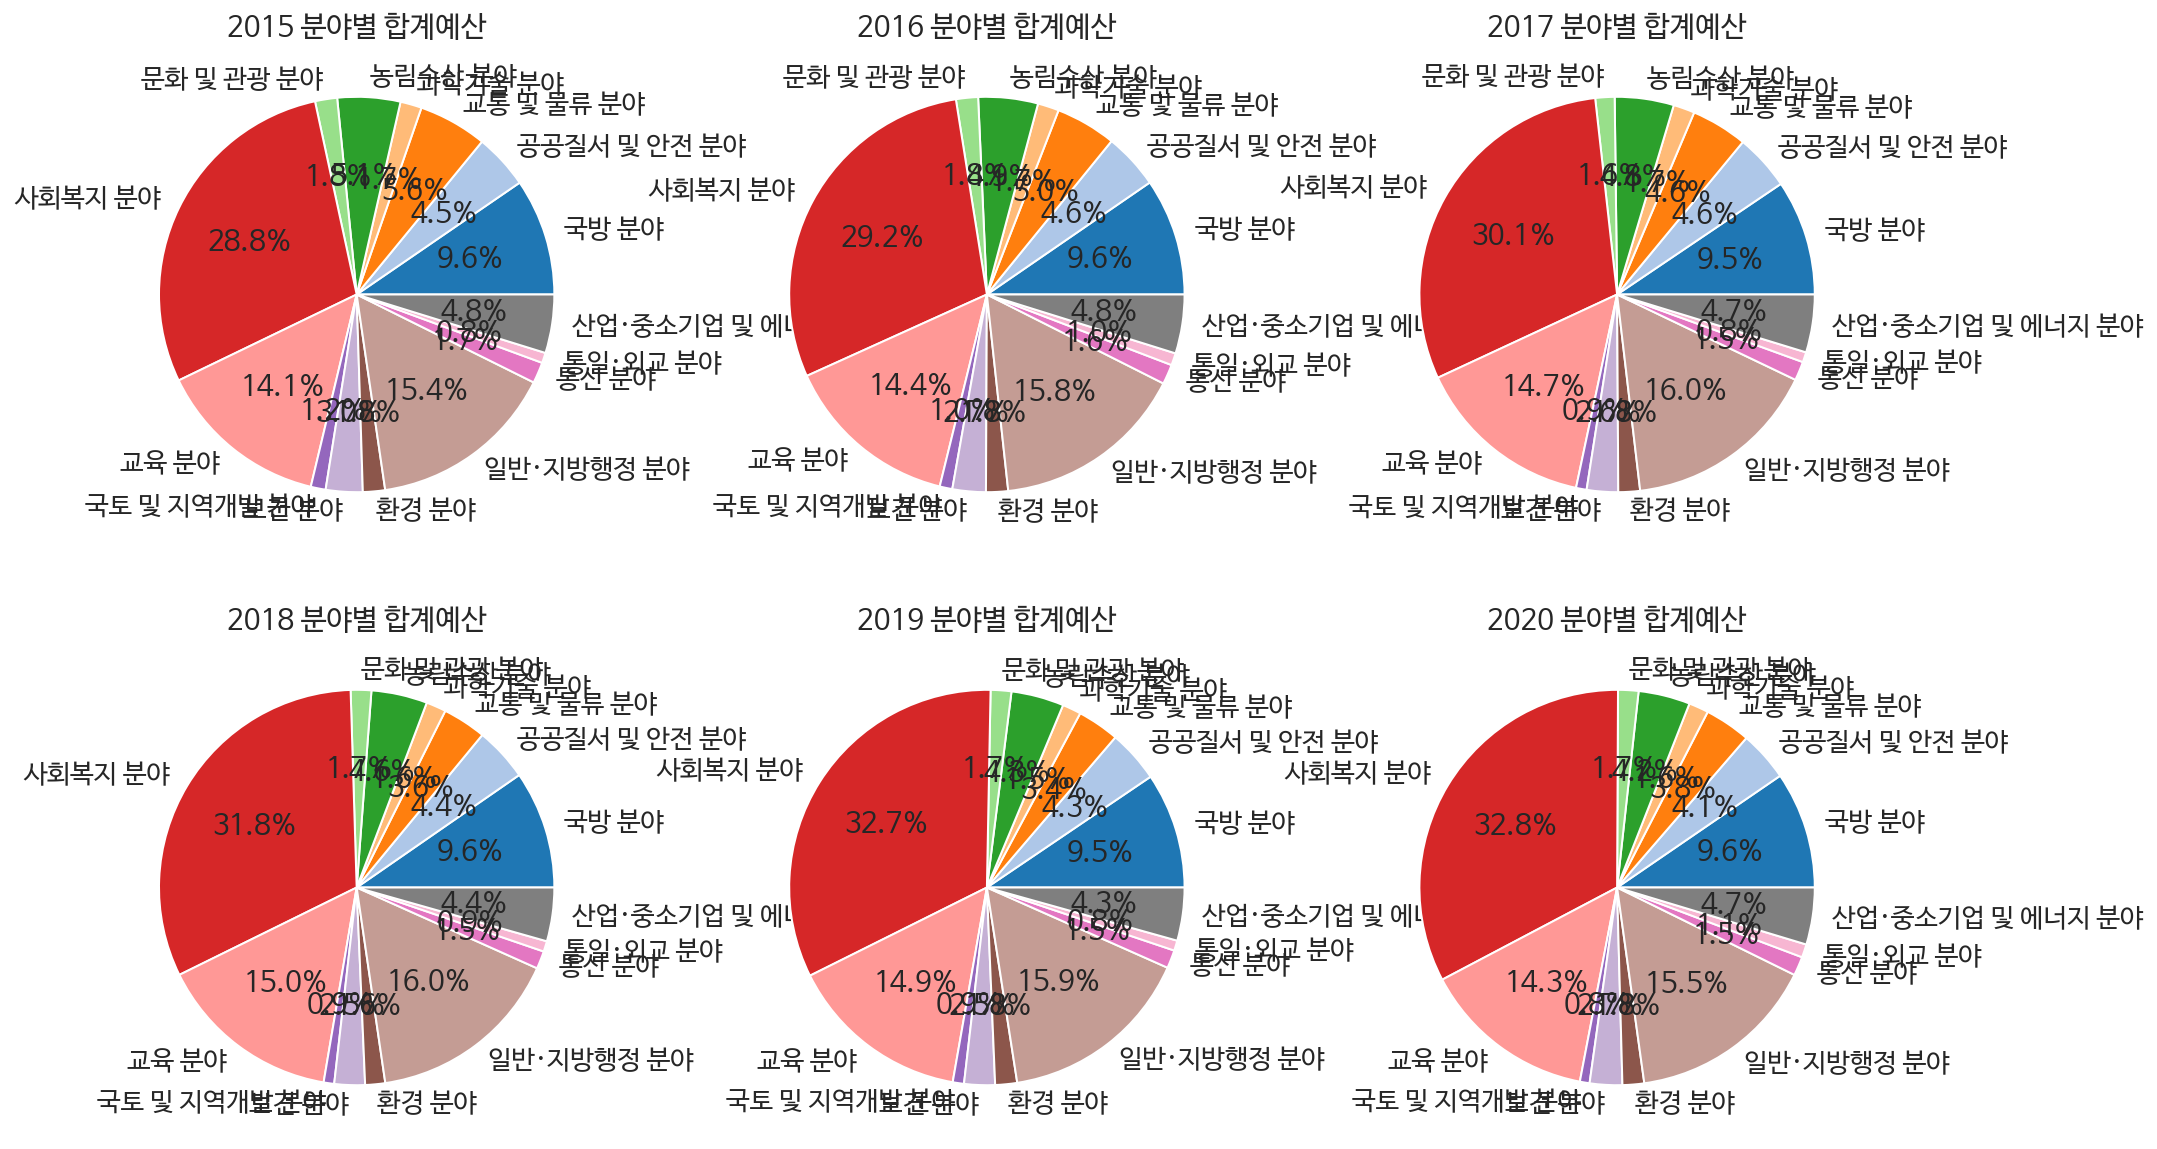

In [181]:
fig, axes = plt.subplots(2,3,figsize=(16,10))
axes = axes.flatten()
for y,ax in zip(range(2015,2021), axes):
  ax.set_title(f'{y} 분야별 합계예산')
  ax.pie(piv.loc[:,y], labels=fildl, autopct='%.1f%%')

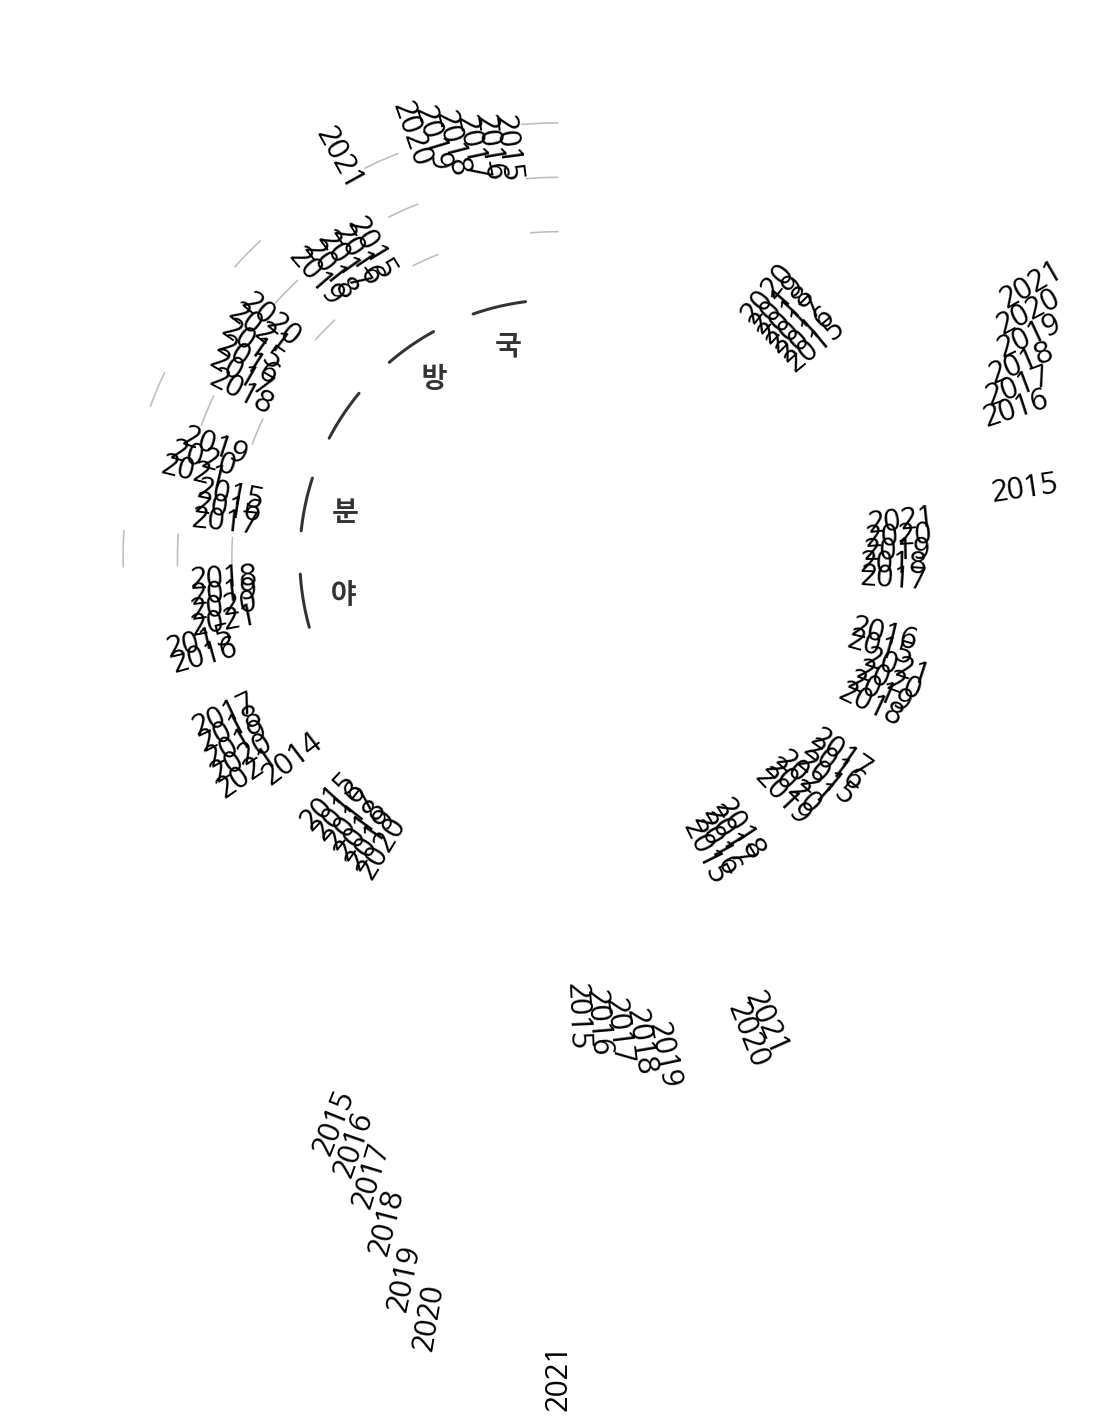

In [203]:
# 커스텀
# AE = [7, 7, 7, 7, 7, 7]


# 필요한 임포트
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd



rng = np.random.default_rng(123)


# 데이터셋
df

# 글자각 조정 ( 180' 기준 )
def get_label_rotation(angle, offset):

    rotation = np.rad2deg(angle + offset)
    if angle <= np.pi:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"
    return rotation, alignment


# 텍스트 간격
def add_labels(angles, values, labels, offset, ax):
    

    padding = 4
    

    for angle, value, label, in zip(angles, values, labels):
        angle = angle
        

        rotation, alignment = get_label_rotation(angle, offset)


        ax.text(
            x=angle, 
            y=value + padding, 
            s=label, 
            ha=alignment, 
            va="center", 
            rotation=rotation, 
            rotation_mode="anchor"
        ) 


# 글자각 조정
def add_labels(angles, values, labels, offset, ax):
    

    padding = 4
    

    for angle, value, label, in zip(angles, values, labels):
        angle = angle
        

        rotation, alignment = get_label_rotation(angle, offset)


        ax.text(
            x=angle, 
            y=value + padding, 
            s=label, 
            ha=alignment, 
            va="center", 
            rotation=rotation, 
            rotation_mode="anchor",
            color='black'
        ) 


# ??
ANGLES = np.linspace(0, 2 * np.pi, len(df), endpoint=False)


WIDTH = 2 * np.pi / len(VALUES)


OFFSET = np.pi / 2


VALUES = df["합계예산(억원)"].values/10000
LABELS = df["연도"].values
GROUP = df["분야"].values

PAD = 3
ANGLES_N = len(VALUES) + PAD * len(np.unique(GROUP))
ANGLES = np.linspace(0, 2 * np.pi, num=ANGLES_N, endpoint=False)
WIDTH = (2 * np.pi) / len(ANGLES)

offset = 0
IDXS = []
GROUPS_SIZE = []
for i in range(15):
    GROUPS_SIZE .append(6)

for size in GROUPS_SIZE:
    IDXS += list(range(offset + PAD, offset + size + PAD))
    offset += size + PAD

fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={"projection": "polar"})
ax.set_theta_offset(OFFSET)
ax.set_ylim(-100, 100)
ax.set_frame_on(False)
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])

COLORS = [f"C{i}" for i, size in enumerate(GROUPS_SIZE) for _ in range(size)]

# ax.bar(
#     ANGLES[IDXS], VALUES, width=WIDTH, color=COLORS, 
#     linewidth=2)

add_labels(ANGLES[IDXS], VALUES, LABELS, OFFSET, ax)
zet = []
for i in range(15):
    zet.append( (df["분야"])[i] )
offset = 0 
i = 0
for group, size in zip(zet[i], GROUPS_SIZE):
    i = i + 1
    x1 = np.linspace(ANGLES[offset + PAD], ANGLES[offset + size + PAD - 1], num=50)
    ax.plot(x1, [-5] * 50, color="#333333")
    

    ax.text(
        np.mean(x1), -20, group, color="#333333", fontsize=14, 
        fontweight="bold", ha="center", va="center"
    )
    

    x2 = np.linspace(ANGLES[offset], ANGLES[offset + PAD - 1], num=50)
    ax.plot(x2, [20] * 50, color="#bebebe", lw=0.8)
    ax.plot(x2, [40] * 50, color="#bebebe", lw=0.8)
    ax.plot(x2, [60] * 50, color="#bebebe", lw=0.8)
    ax.plot(x2, [80] * 50, color="#bebebe", lw=0.8)
    ax.plot(x2, [100] * 50, color="#bebebe", lw=0.8)
    ax.plot(x2, [120] * 50, color="#bebebe", lw=0.8)
    
    offset += size + PAD

ValueError: ignored

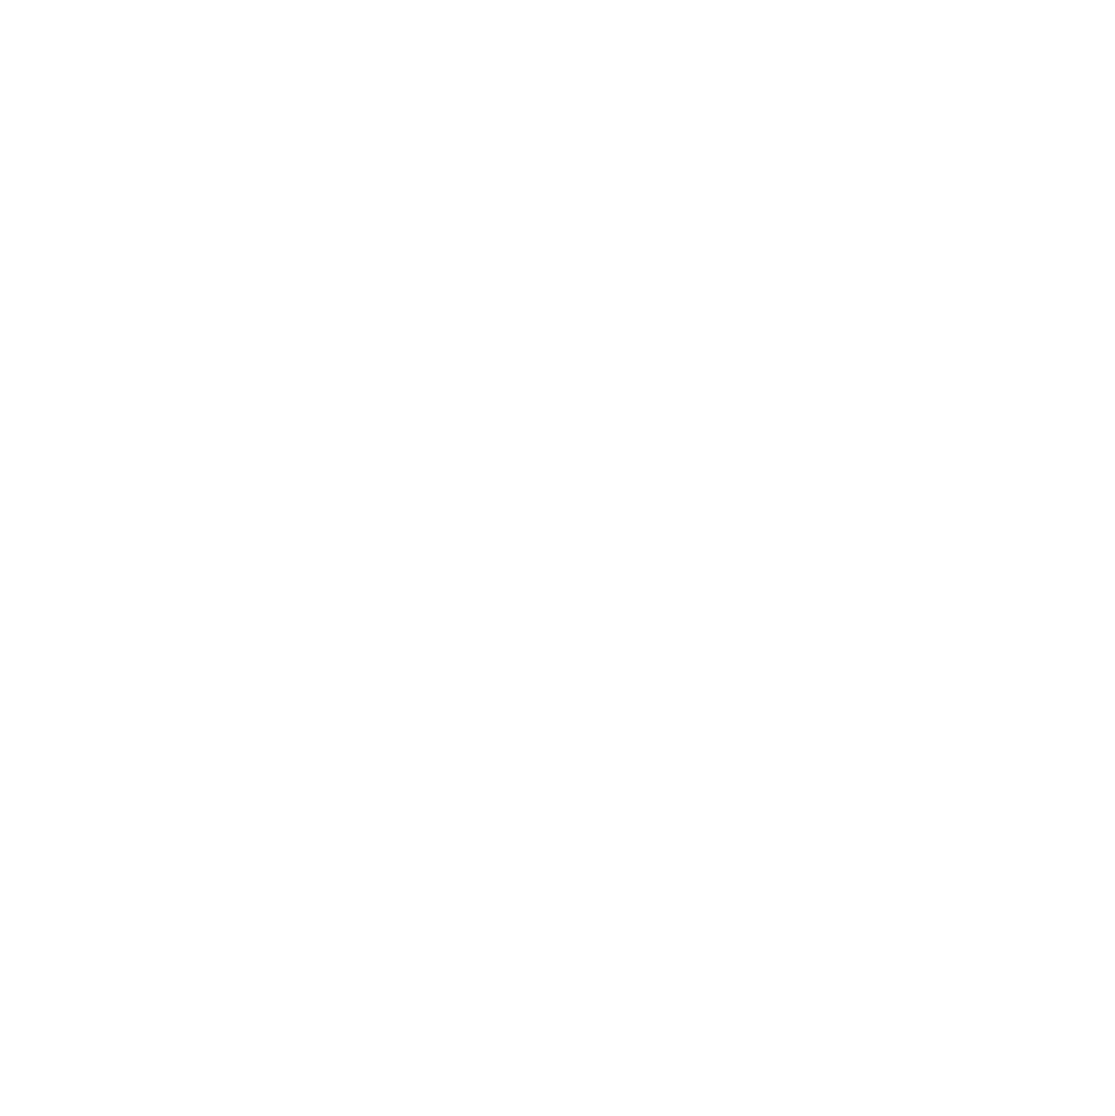

In [187]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# Ensures reproducibility of random numbers
rng = np.random.default_rng(123)
# Build a dataset

def get_label_rotation(angle, offset):
    # Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle + offset)
    if angle <= np.pi:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"
    return rotation, alignment

def add_labels(angles, values, labels, offset, ax):
    
    # This is the space between the end of the bar and the label
    padding = 4
    
    # Iterate over angles, values, and labels, to add all of them.
    for angle, value, label, in zip(angles, values, labels):
        angle = angle
        
        # Obtain text rotation and alignment
        rotation, alignment = get_label_rotation(angle, offset)

        # And finally add the text
        ax.text(
            x=angle, 
            y=value + padding, 
            s=label, 
            ha=alignment, 
            va="center", 
            rotation=rotation, 
            rotation_mode="anchor"
        ) 

def add_labels(angles, values, labels, offset, ax):
    
    # This is the space between the end of the bar and the label
    padding = 4
    
    # Iterate over angles, values, and labels, to add all of them.
    for angle, value, label, in zip(angles, values, labels):
        angle = angle
        
        # Obtain text rotation and alignment
        rotation, alignment = get_label_rotation(angle, offset)

        # And finally add the text
        ax.text(
            x=angle, 
            y=value + padding, 
            s=label, 
            ha=alignment, 
            va="center", 
            rotation=rotation, 
            rotation_mode="anchor",
            color='black'
        ) 

ANGLES = np.linspace(0, 2 * np.pi, len(df), endpoint=False)
VALUES = df["합계예산(억원)"].values
LABELS = df["분야"].values

# Determine the width of each bar. 
# The circumference is '2 * pi', so we divide that total width over the number of bars.
WIDTH = 2 * np.pi / len(VALUES)

# Determines where to place the first bar. 
# By default, matplotlib starts at 0 (the first bar is horizontal)
# but here we say we want to start at pi/2 (90 deg)
OFFSET = np.pi / 2

# All this part is like the code above
VALUES = df["합계예산(억원)"].values
LABELS = df["분야"].values
GROUP = df["연도"].values

PAD = 3
ANGLES_N = len(VALUES) + PAD * len(np.unique(GROUP))
ANGLES = np.linspace(0, 2 * np.pi, num=ANGLES_N, endpoint=False)
WIDTH = (2 * np.pi) / len(ANGLES)

offset = 0
IDXS = []
GROUPS_SIZE = [10, 20, 12, 8]
for size in GROUPS_SIZE:
    IDXS += list(range(offset + PAD, offset + size + PAD))
    offset += size + PAD

fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={"projection": "polar"})
ax.set_theta_offset(OFFSET)
ax.set_ylim(-100, 100)
ax.set_frame_on(False)
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])

GROUPS_SIZE = [10, 20, 12, 8]
COLORS = [f"C{i}" for i, size in enumerate(GROUPS_SIZE) for _ in range(size)]

ax.bar(
    ANGLES[IDXS], VALUES, width=WIDTH, color=COLORS, 
    edgecolor="white", linewidth=2
)

add_labels(ANGLES[IDXS], VALUES, LABELS, OFFSET, ax)

# Extra customization below here --------------------

# This iterates over the sizes of the groups adding reference
# lines and annotations.

offset = 0 
for group, size in zip(["A", "B", "C", "D"], GROUPS_SIZE):
    # Add line below bars
    x1 = np.linspace(ANGLES[offset + PAD], ANGLES[offset + size + PAD - 1], num=50)
    ax.plot(x1, [-5] * 50, color="#333333")
    
    # Add text to indicate group
    ax.text(
        np.mean(x1), -20, group, color="#333333", fontsize=14, 
        fontweight="bold", ha="center", va="center"
    )
    
    # Add reference lines at 20, 40, 60, and 80
    x2 = np.linspace(ANGLES[offset], ANGLES[offset + PAD - 1], num=50)
    ax.plot(x2, [20] * 50, color="#bebebe", lw=0.8)
    ax.plot(x2, [40] * 50, color="#bebebe", lw=0.8)
    ax.plot(x2, [60] * 50, color="#bebebe", lw=0.8)
    ax.plot(x2, [80] * 50, color="#bebebe", lw=0.8)
    
    offset += size + PAD

In [189]:
VALUES = df["합계예산(억원)"].values
LABELS = df["분야"].values
GROUP = df["연도"].values
VALUES, LABELS, GROUP

(array([ 355926,  368460,  379425,  412322,  449063,  486935,  514176,
         167252,  174966,  183342,  188128,  202277,  208371,  223050,
         208920,  190500,  184756,  152515,  162935,  191844,  214243,
          65070,   66769,   70076,   69809,   72507,   82413,   89798,
         191130,  187369,  193670,  195821,  204327,  215153,  226557,
          61963,   67212,   69327,   63239,   72003,   80181,   84816,
        1070096, 1124165, 1210037, 1360380, 1548464, 1670211, 1850459,
         524707,  553716,  591921,  643411,  705300,  726344,  712076,
          45298,   39793,   34732,   36790,   43509,   40467,   50847,
         111881,  104749,  102808,  106925,  119351,  135219,  146968,
          67406,   69236,   71059,   69867,   84842,   90129,  106157,
         570923,  608948,  643436,  683844,  753543,  790129,  846766,
          63921,   62347,   62185,   62162,   70414,   78861,   84435,
          31261,   38199,   33061,   36815,   39416,   55092,   57037,
      

  * 정리하기
    - .
    - .
    - . 
      

## Step 2 : 따라 해보기
---

https://dacon.io/competitions/official/235767/codeshare/3238?page=1&dtype=random

In [186]:
df

,연도,기준,합계예산(억원),부문당 예산(억원),프로그램당 예산(억원),단위사업당 예산(억원),세부사업당 예산(억원),분야
0,2015,결산,355926,88982,11481,2579,716,국방 분야
1,2016,결산,368460,92115,11165,2507,746,국방 분야
2,2017,결산,379425,94856,11498,2730,799,국방 분야
3,2018,결산,412322,103081,15859,3890,879,국방 분야
4,2019,결산,449063,112266,17963,4277,980,국방 분야
...,...,...,...,...,...,...,...,...
100,2017,결산,189807,31635,3954,808,324,산업·중소기업 및 에너지 분야
101,2018,결산,187675,31279,3910,792,304,산업·중소기업 및 에너지 분야
102,2019,결산,205535,25692,4894,1023,300,산업·중소기업 및 에너지 분야
103,2020,본예산,237154,29644,5784,1204,318,산업·중소기업 및 에너지 분야


## Step 3: 스스로 해보기
---

* 주제: 

In [ ]:
/content/drive/MyDrive/DataSetting/한국재정정보원_dataset